# Import necessary libraries

## Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/UET/Computational Neuroscience"

/content/drive/MyDrive/UET/Computational Neuroscience


## Other libraries

In [3]:
!pip install PyWavelets mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 62.6 MB/s eta 0:00:00


In [4]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

import pandas as pd
import torch
from torch.utils.data import Dataset
import os
import mne

from scipy.fft import fft, fftfreq
import gc

## Paths

In [5]:
data_dir = './Neuro/total'
train_csv_file = './Neuro/train_set.csv'
test_csv_file = './Neuro/test_set.csv'
total_csv_file = './Neuro/filtered_subjects_with_age.tsv'

# Test

In [6]:
def fft_plot(fft_result_channel, frequencies, channel_id, name, age, folder_save):
    file_save = os.path.join(folder_save, f'Age-{age}_Name-{name}.png')
    # Example: Plot the Fourier Transform of the first channel
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, np.abs(fft_result_channel))
    plt.title(f'Fourier Transform - Channel {channel_id} - Participant {name} - Age {age}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.savefig(file_save)
    plt.close()

    print(f"Fourier Transform plot saved to {file_save}")


def fft_52(file_name, name, age, fs=250, folder_save="./plot_channels", min_threshold=4000, max_threshold=8000):
    rawdata = mne.io.read_raw_fif(file_name, preload=True)
    eeg_data_fft = rawdata.get_data()
    # Perform Fourier Transform on each channel
    fft_results = []
    frequencies = fftfreq(eeg_data_fft.shape[1], 1/fs)
    for channel in range(eeg_data_fft.shape[0]):
        signal = eeg_data_fft[channel, :]
        fft_result = fft(signal)

        filtered_fft_result = np.where(np.abs(fft_result) > min_threshold, fft_result, 0)
        filtered_fft_result = np.where(np.abs(filtered_fft_result) < max_threshold, filtered_fft_result, 0)

        fft_results.append(filtered_fft_result)

    for channel_id, fft_result in enumerate(fft_results):
        if channel_id >= 52:
            break
        folder_to_save = os.path.join(folder_save, "channel-{:02}".format(channel_id))
        os.makedirs(folder_to_save, exist_ok=True)
        fft_plot(fft_result, frequencies, channel_id, name, age, folder_to_save)

    # cut off freq threshold
    for channel_id, fft_result in enumerate(fft_results):
        if channel_id >= 52:
            break

        folder_to_save = os.path.join(folder_save, "channel-{:02}".format(channel_id))
        os.makedirs(folder_to_save, exist_ok=True)



In [7]:
# read total file
meta_pd = pd.read_csv(total_csv_file, sep='\t')

min_threshold = 4000
max_threshold = 10000

for i in range(len(meta_pd)):
    age = meta_pd.at[i, 'age']
    name = meta_pd.at[i, 'participant_id']
    file_name = os.path.join(data_dir, f'{name}_sflip_parc-raw.fif')

    fft_52(file_name, name, age,
           fs=250, folder_save="./plot_channels_total",
           min_threshold=min_threshold, max_threshold=max_threshold)

    break

Opening raw data file ./Neuro/total/sub-CC110033_sflip_parc-raw.fif...
    Range : 16750 ... 160249 =     67.000 ...   640.996 secs
Ready.
Reading 0 ... 143499  =      0.000 ...   573.996 secs...
Fourier Transform plot saved to ./plot_channels_total/channel-00/Age-24_Name-sub-CC110033.png
Fourier Transform plot saved to ./plot_channels_total/channel-01/Age-24_Name-sub-CC110033.png
Fourier Transform plot saved to ./plot_channels_total/channel-02/Age-24_Name-sub-CC110033.png
Fourier Transform plot saved to ./plot_channels_total/channel-03/Age-24_Name-sub-CC110033.png
Fourier Transform plot saved to ./plot_channels_total/channel-04/Age-24_Name-sub-CC110033.png
Fourier Transform plot saved to ./plot_channels_total/channel-05/Age-24_Name-sub-CC110033.png
Fourier Transform plot saved to ./plot_channels_total/channel-06/Age-24_Name-sub-CC110033.png
Fourier Transform plot saved to ./plot_channels_total/channel-07/Age-24_Name-sub-CC110033.png
Fourier Transform plot saved to ./plot_channels_tota

74.40573618236692


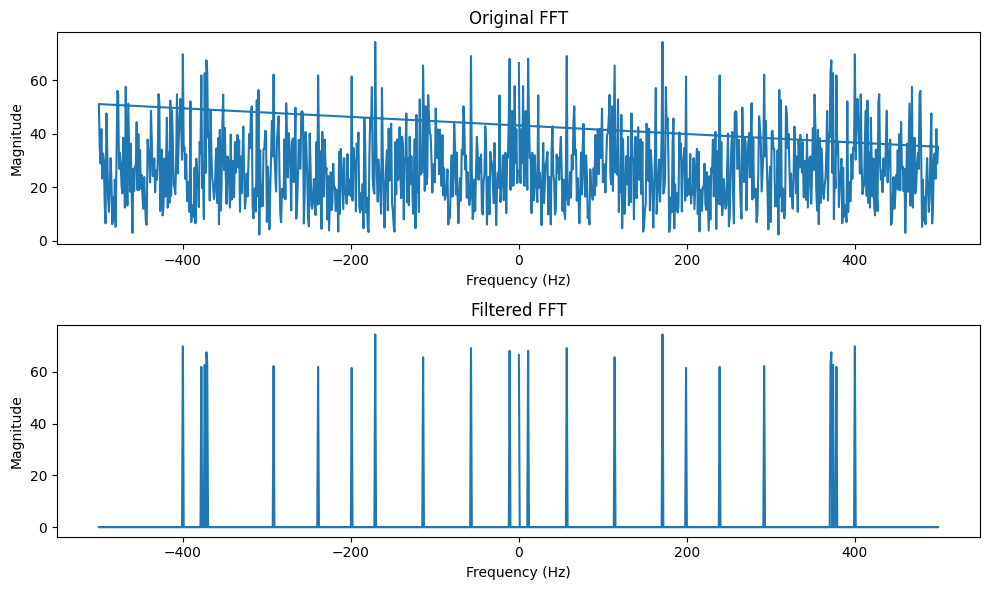

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


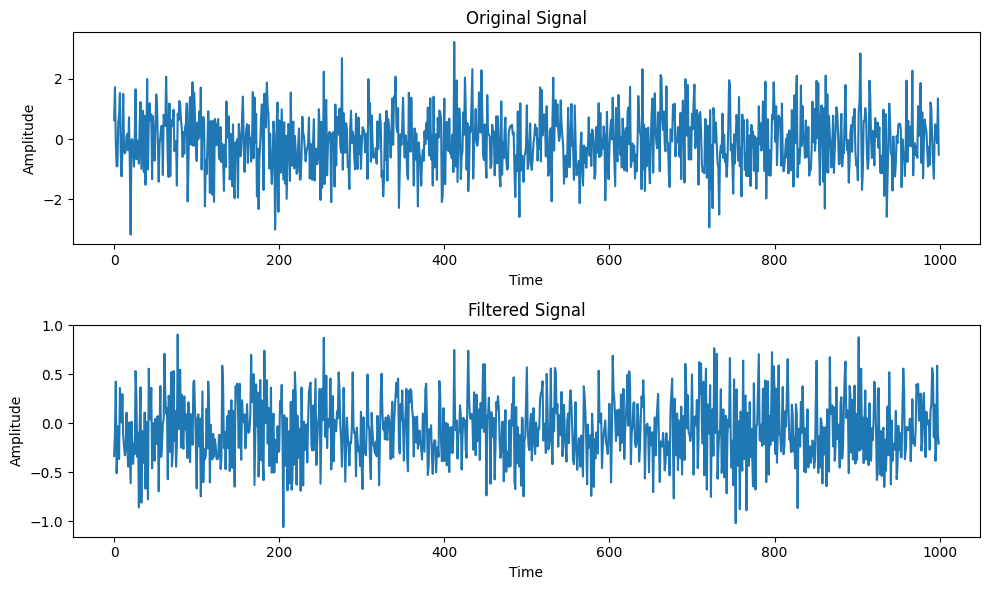

In [8]:
# random image of torch

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

# Example EEG data with 1000 time points
eeg_data = np.random.randn(1000)

# Sampling frequency (Hz)
fs = 1000

# Perform Fourier Transform
fft_result = fft(eeg_data)
frequencies = fftfreq(len(eeg_data), 1/fs)

print(np.max(np.abs(fft_result)))

# Set a magnitude threshold
threshold = 60

# Filter out frequencies below the threshold
filtered_fft_result = np.where(np.abs(fft_result) > threshold, fft_result, 0)

# Perform Inverse Fourier Transform to get the filtered signal
filtered_signal = ifft(filtered_fft_result)

# Plot the original and filtered FFT results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(fft_result))
plt.title('Original FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(filtered_fft_result))
plt.title('Filtered FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(eeg_data)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

